## Programming Exercise 1: Linear Regression

In [153]:
# %matplotlib inline 可以在Ipython编译器里直接使用，功能是可以内嵌绘图，并且可以省略掉plt.show()这一步,但最新版的jupyter好像改善了
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

### 2 Linear regression with one variable

In [154]:
datafile = 'E:\BaiduYunDownload\Andrew NG\machinelearning.ai\Coursera-ML\coursera_ml_ipynb\ex1\data\ex1data1.txt' #ex1data1.txt的绝对路径
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True) #写入逗号分隔数据
# 排列通常的“X”矩阵和“y”向量
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # 训练样例
# 将通常的1列插入“X”矩阵
X = np.insert(X,0,1,axis=1)

#### 2.1 Plotting the Data

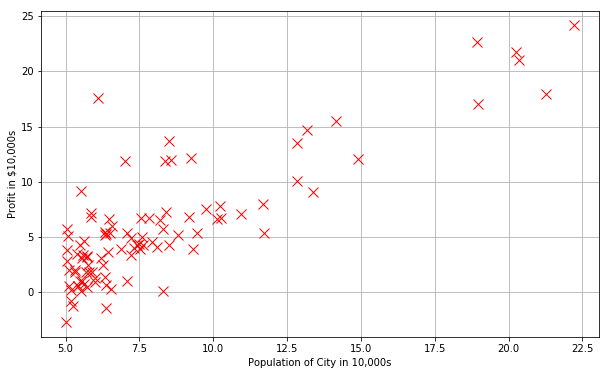

In [155]:
# 画出图来看看咋样啊
plt.figure(figsize=(10,6)) # 创建一个图形实例；figsize:以英寸为单位的宽高，缺省值为 rc figure.figsize (1英寸等于2.54厘米)
plt.plot(X[:,1],y[:,0],'rx',markersize=10)
plt.grid(True) # 总是显示网格线
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.show()

#### 2.2 Gradient Descent

In [156]:
iterations = 1500
alpha = 0.01

In [157]:
def h(theta,X): # 定义假设函数
    return np.dot(X,theta)

def computeCost(mytheta,X,y): # 定义损失函数
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    """
    # 小心: *.shape 是 (rows, columns)
    return float((1./(2*m)) * np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y)))

# 测试运行这个损失函数当θ为0时返回32.07

initial_theta = np.zeros((X.shape[1],1)) #θ是一个0行1列的（如果X是有n个特征的话）
print(computeCost(initial_theta,X,y))

32.07273387745567


In [158]:
# 最小化实际上的梯度下降程序
def descendGradient(X, theta_start = np.zeros(2)):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    """
    theta = theta_start
    jvec = [] # 通常画出损失值作为迭代函数
    thetahistory = [] # 这里看θ的迭代变化，通常可视化后面的最小化路径，可以用%time来试一下时间
    for meaninglessvariable in range(iterations):
        tmptheta = theta
        jvec.append(computeCost(theta,X,y))
        thetahistory.append(list(theta[:,0]))
        # 同时更新θ值
        for j in range(len(tmptheta)):
            tmptheta[j] = theta[j] - (alpha/m)*np.sum((h(initial_theta,X) - y)*np.array(X[:,j]).reshape(m,1))
        theta = tmptheta
    return theta, thetahistory, jvec

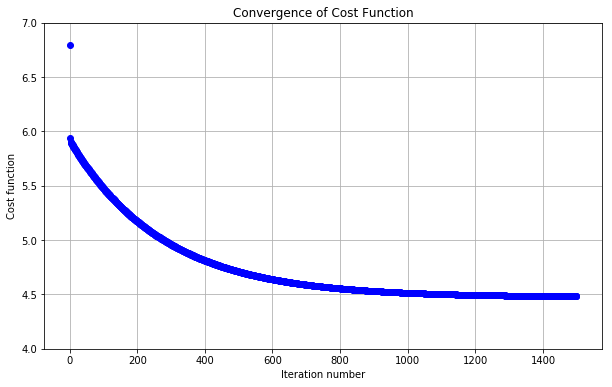

In [159]:
# 运行梯度下降以获得最佳拟合θ值
initial_theta = np.zeros((X.shape[1],1))
theta, thetahistory, jvec = descendGradient(X,initial_theta)

# 画出损失函数的收敛处
def plotConvergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    dummy = plt.xlim([-0.05*iterations,1.05*iterations])
    # dummy = plt.ylim([4,8])

plotConvergence(jvec)
dummy = plt.ylim([4,7])

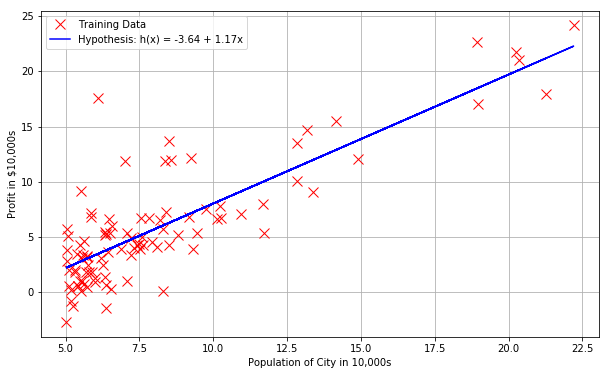

In [160]:
# 在数据的顶部绘制线以确保其看起来正确
def myfit(xval):
    return theta[0] + theta[1]*xval
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],myfit(X[:,1]),'b-',label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.grid(True) # 始终画出网格线
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()
plt.show()

#### 2.4 Visualizing _J($\theta$)_

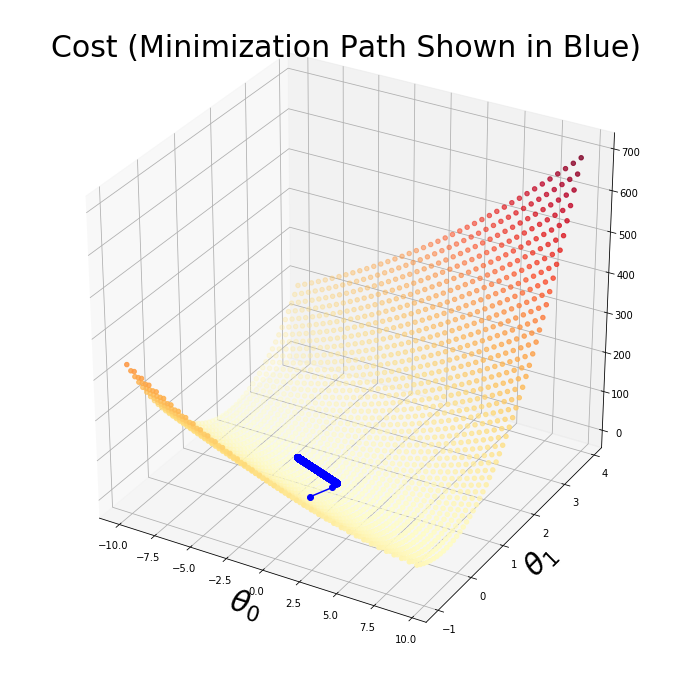

In [161]:
# 导入3D库
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for david in xvals:
    for kaleko in yvals:
        myxs.append(david)
        myys.append(kaleko)
        myzs.append(computeCost(np.array([[david], [kaleko]]),X,y))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('YlOrRd'))

plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)
plt.plot([x[0] for x in thetahistory],[x[1] for x in thetahistory],jvec,'bo-')
plt.show()

### 3. Linear Regression with multiple variables

In [166]:
datafile = 'E:\BaiduYunDownload\Andrew NG\machinelearning.ai\Coursera-ML\coursera_ml_ipynb\ex1\data\ex1data2.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) 
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size
X = np.insert(X,0,1,axis=1)

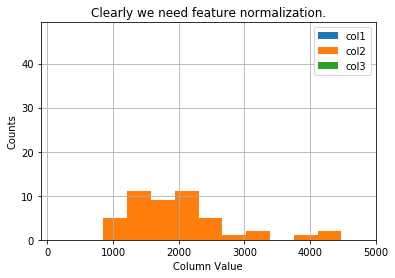

In [174]:
plt.grid(True)
plt.xlim([-100,5000])
dummy = plt.hist(X[:,0],label = 'col1')
dummy = plt.hist(X[:,1],label = 'col2')
dummy = plt.hist(X[:,2],label = 'col3')
plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

In [175]:
#列特征标准化（减去平均值，除以标准差）

#存起来平均数和偏差供以后使用

#不修改原始X矩阵，使用副本
stored_feature_means, stored_feature_stds = [], []
Xnorm = X.copy()
for icol in range(Xnorm.shape[1]):
    stored_feature_means.append(np.mean(Xnorm[:,icol]))
    stored_feature_stds.append(np.std(Xnorm[:,icol]))
    # 跳过一列
    if not icol: continue
    # 不再重新计算均值和均值，只是使用了存储的值
    Xnorm[:,icol] = (Xnorm[:,icol] - stored_feature_means[-1])/stored_feature_stds[-1]

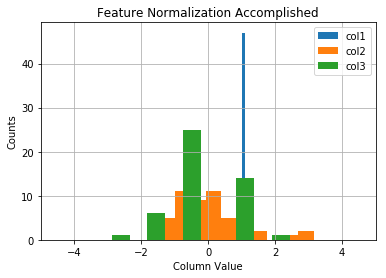

In [176]:
# 快速可视化特征规范化数据
plt.grid(True)
plt.xlim([-5,5])
dummy = plt.hist(Xnorm[:,0],label = 'col1')
dummy = plt.hist(Xnorm[:,1],label = 'col2')
dummy = plt.hist(Xnorm[:,2],label = 'col3')
plt.title('Feature Normalization Accomplished')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

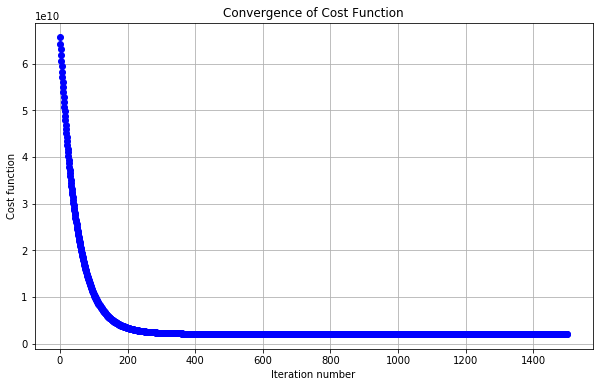

In [177]:
#Run梯度下降有多个变量，初始theta仍然设置为零＃（注意！这不起作用，除非我们具有规范化！“溢出遇到溢出”）
initial_theta = np.zeros((Xnorm.shape[1],1))
theta, thetahistory, jvec = descendGradient(Xnorm,initial_theta)

# 画出损失函数的收敛处:
plotConvergence(jvec)

In [183]:
#print("最终的θ参数: \n",theta)
print("检查结果：1650平三室的房子多少钱？")
ytest = np.array([1650.,3.])
# 撤销特征规范化
ytestscaled = [(ytest[x]-stored_feature_means[x+1])/stored_feature_stds[x+1] for x in range(len(ytest))]
ytestscaled.insert(0,1)
print("$%0.2f" % float(h(theta,ytestscaled)))

检查结果：1650平三室的房子多少钱？
$293098.15


In [184]:
from numpy.linalg import inv
# 实现普通方程去分析解决线性回归
def normEqtn(X,y):
    #restheta = np.zeros((X.shape[1],1))
    return np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y)

In [186]:
print ("普通方程预测1650平的三室房子多少钱")
print ("$%0.2f" % float(h(normEqtn(X,y),[1,1650.,3])))

普通方程预测1650平的三室房子多少钱
$293081.46
